## If you are running container on machine with GPU 

In [ ]:
!pip install --no-cache-dir http://download.pytorch.org/whl/cu80/torch-0.1.12.post2-cp27-none-linux_x86_64.whl

## Otherwise install CPU version

In [1]:
! pip install --no-cache-dir http://download.pytorch.org/whl/cu75/torch-0.1.12.post2-cp27-none-linux_x86_64.whl

    100% |################################| 348.8MB 7.0MB/s ta 0:00:011B/s eta 0:00:03###### | 342.8MB 7.5MB/s eta 0:00:01


## Install torchvision & download CRNN model ( for both CPU & GPU)

In [7]:
!pip install --upgrade torchvision
!wget https://www.dropbox.com/s/l0vo83hmvv2aipn/crnn.pth

--2017-09-11 18:47:24--  https://www.dropbox.com/s/l0vo83hmvv2aipn/crnn.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1, 2620:100:6019:1:ffff:ffff:a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/JrwhKey6uMi0Pmg30MD44jo19h5iHRW3tYSJwREFz7wz9froZvOWNMGnamddduHa/file [following]
--2017-09-11 18:47:25--  https://dl.dropboxusercontent.com/content_link/JrwhKey6uMi0Pmg30MD44jo19h5iHRW3tYSJwREFz7wz9froZvOWNMGnamddduHa/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.4.6, 2620:100:6019:6:ffff:ffff:a27d:406
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.4.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33351680 (32M) [text/plain]
Saving to: 'crnn.pth'

100%[======================================>] 33,351,680  13.6MB/s   in 2.3s   

2017-09-11 18:47:2

In [8]:
import sys
sys.path.append('../../')

In [9]:
import dvalib.crnn.utils as utils 
import dvalib.crnn.dataset as dataset
import torch
from torch.autograd import Variable
from PIL import Image
import dvalib.crnn.models.crnn as crnn
import glob
from IPython.core import display


model_path = 'crnn.pth'
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
model = crnn.CRNN(32, 1, 37, 256, 1)
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))
converter = utils.strLabelConverter(alphabet)
transformer = dataset.resizeNormalize((100, 32))

loading pretrained model from crnn.pth


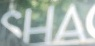

s-------h--------a-------- => sha                 


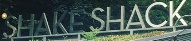

ss-h-a--k-e-ssh--aa-c--k-- => shakeshack          


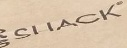

s--s---n----a---c---k----- => ssnack              


p---la-sstiic--b-a--g--s-- => plasticbags         


f--o--o-d---ss-c-ra--p--s- => foodscraps          


e--x--e-r--e--g--a--t--e-- => exeregate           


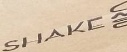

s----p----a---k---e----s-- => spakes              


In [10]:
for img_path in glob.glob('boxes/*.jpg'):
    image = Image.open(img_path).convert('L')
    image = transformer(image)
    image = image.view(1, *image.size())
    image = Variable(image)
    model.eval()
    preds = model(image)
    _, preds = preds.max(2)
    preds = preds.squeeze(2)
    preds = preds.transpose(1, 0).contiguous().view(-1)
    preds_size = Variable(torch.IntTensor([preds.size(0)]))
    raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
    sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
    display.display(display.Image(img_path))
    print('%-20s => %-20s' % (raw_pred, sim_pred))